In [14]:
import pandas as pd

# loading the dataset
data = pd.read_csv('train.csv')
# extracting explanatory variables and objects variable
features = data[['GrLivArea', 'YearBuilt']]
target = data['SalePrice']

# displaying the results
print("Features:\n", features.head())
print("\nTarget:\n", target.head())


Features:
    GrLivArea  YearBuilt
0       1710       2003
1       1262       1976
2       1786       2001
3       1717       1915
4       2198       2000

Target:
 0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


Mean Squared Error (MSE): 2495554898.668322


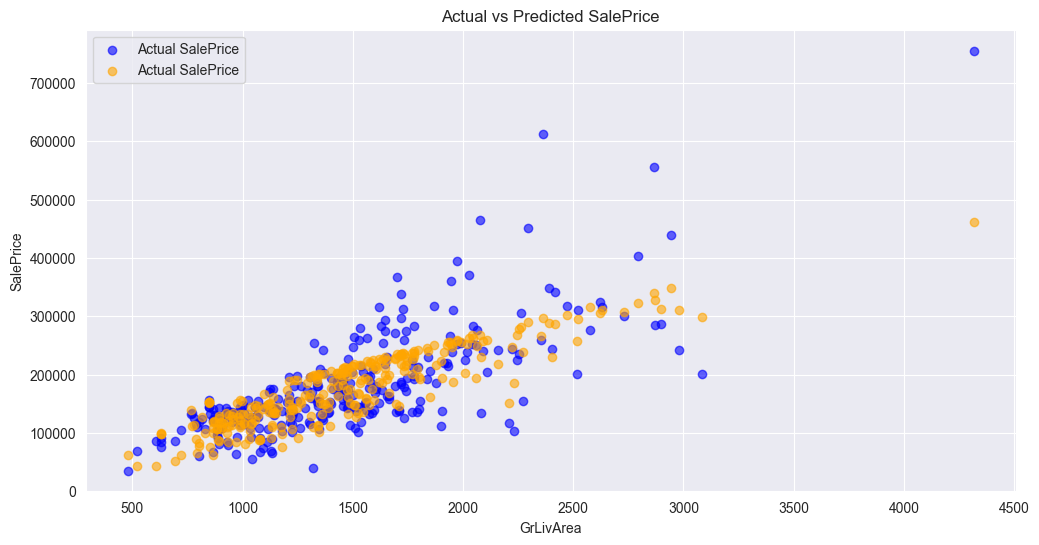

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# loading the dataset
data = pd.read_csv('train.csv')
# extracting the explanatory variables and the objective variable
features = data[['GrLivArea','YearBuilt']]
target = data['SalePrice']
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# initializing the linear regression model
model = LinearRegression()

# training the model
model.fit(X_train, y_train)

# making predictions
y_pred = model.predict(X_test)

# evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:2f}")

# visualizing the result
# comparing the GrLivArea with the predicted and actual SalePrice
plt.figure(figsize=(12,6))
plt.scatter (X_test['GrLivArea'], y_test, color='blue', label='Actual SalePrice', alpha=0.6)
plt.scatter(X_test['GrLivArea'], y_pred, color='orange', label='Actual SalePrice', alpha=0.6)
plt.title("Actual vs Predicted SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.grid(True)
plt.show()



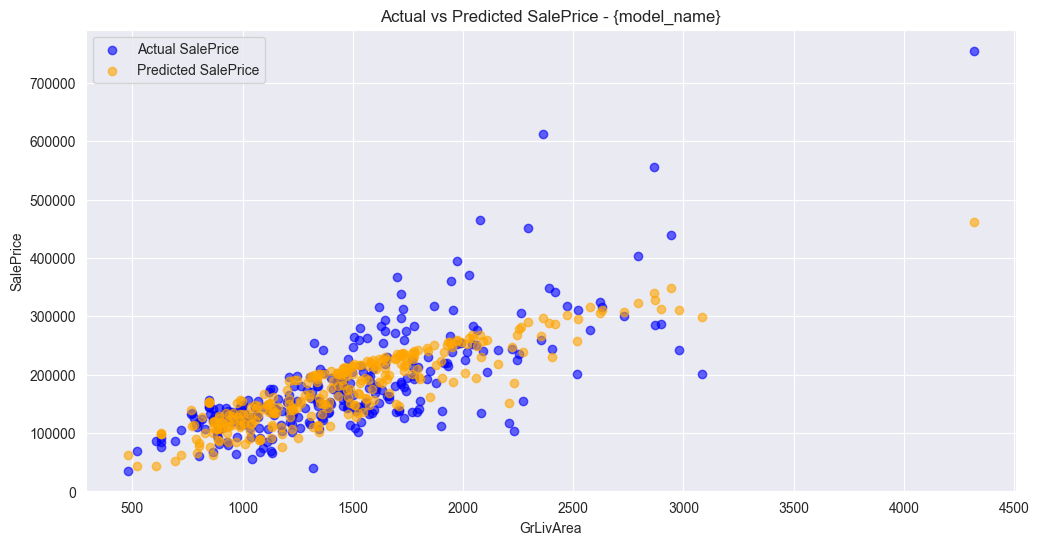

Model Comparison Summary:
                                 MSE
Linear Regression  2495554898.668322


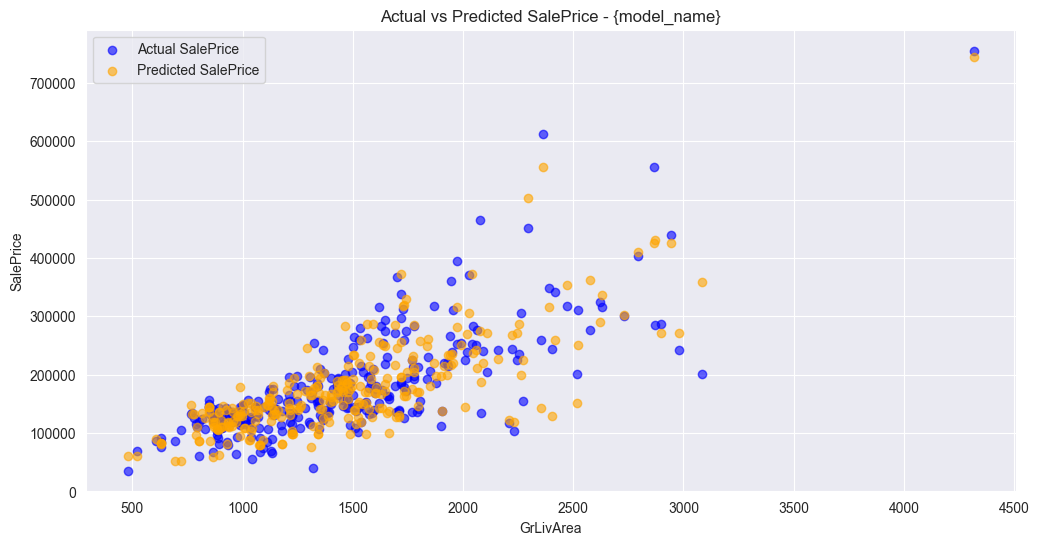

Model Comparison Summary:
                                 MSE
Linear Regression  2495554898.668322
Decision Tree      2069730071.155346


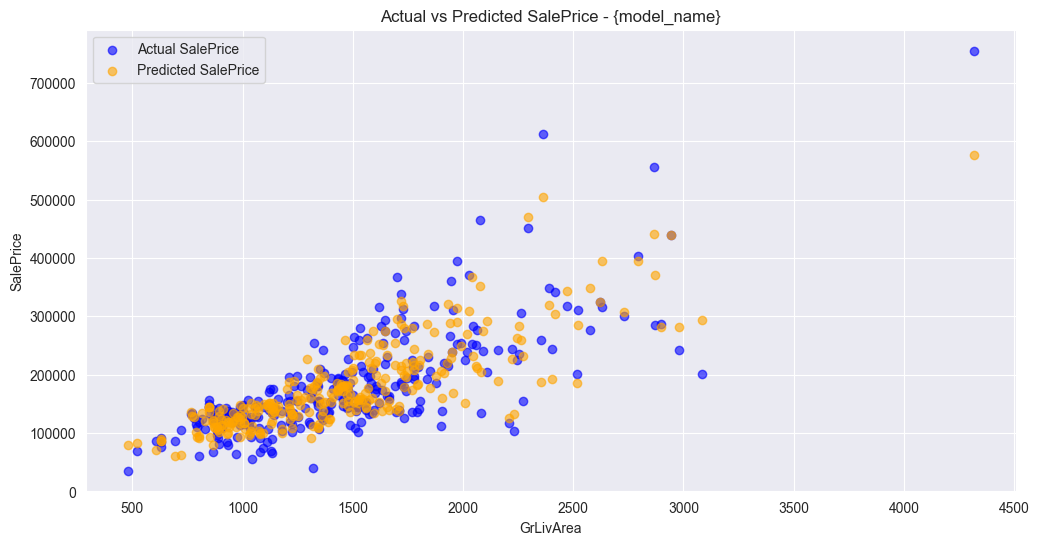

Model Comparison Summary:
                                 MSE
Linear Regression  2495554898.668322
Decision Tree      2069730071.155346
Random Forest      1590129479.533157


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# loading the data
data = pd.read_csv('train.csv')
# extracting explanatory variables and the objective variable
features = data[['GrLivArea','YearBuilt']]
target = data['SalePrice']

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# initializing the model
models ={
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}
# initializing the dictionary to store the results
results =  {}
# training, predicting and evaluating each model
for model_name, model in models.items():
    # training the model
    model.fit(X_train, y_train)
    # making the predictions
    y_pred = model.predict(X_test)
    # calculating the mean_squared_error
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = {"MSE": mse, "Predictions": y_pred}
    # visualizing the results
    plt.figure(figsize=(12,6))
    plt.scatter(X_test['GrLivArea'], y_test, color='blue', label='Actual SalePrice', alpha=0.6)
    plt.scatter(X_test['GrLivArea'], y_pred, color='orange', label='Predicted SalePrice', alpha=0.6)
    plt.title("Actual vs Predicted SalePrice - {model_name}")
    plt.xlabel("GrLivArea")
    plt.ylabel("SalePrice")
    plt.legend()
    plt.grid(True)
    plt.show()

    # creating a dataframe to summarize the MSE values
    mse_summary = pd.DataFrame(results).T[['MSE']]
    print("Model Comparison Summary:")
    print(mse_summary)




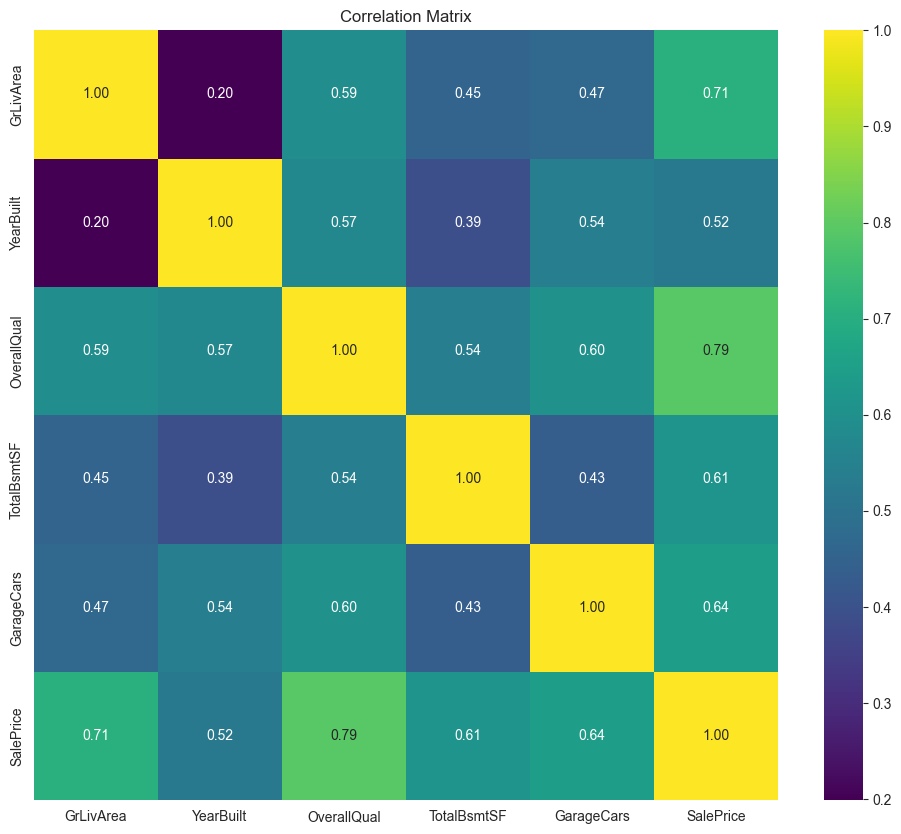

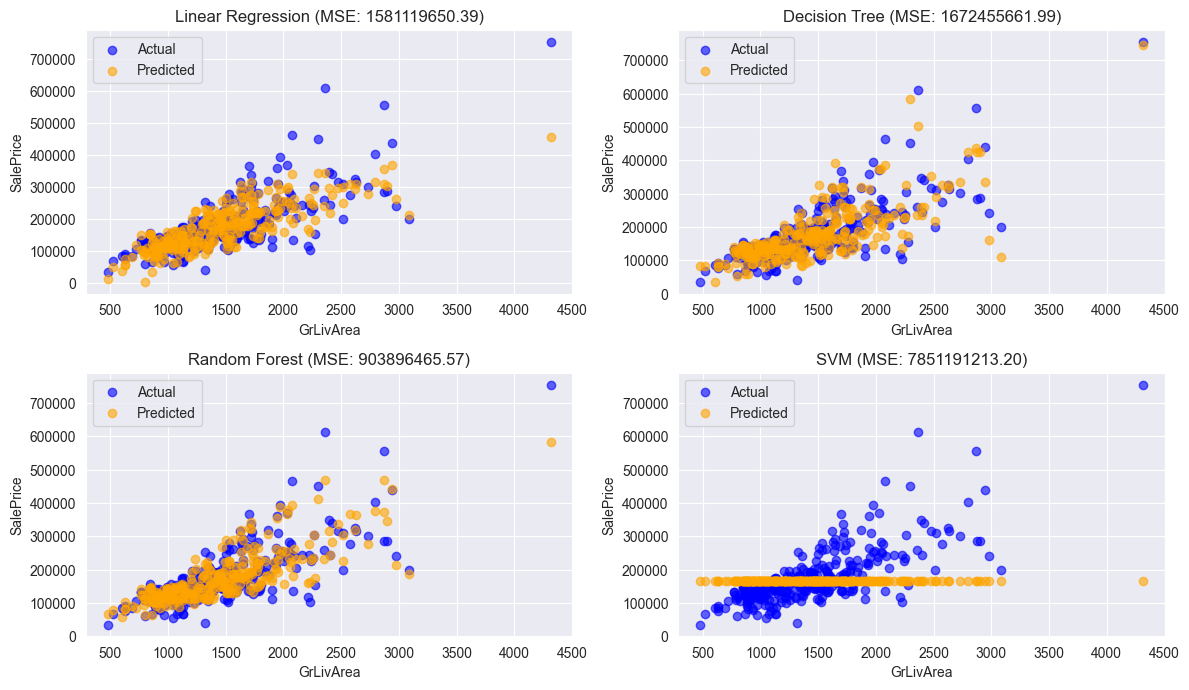

                                             0                            1  \
Linear Regression  {'MSE': 1581119650.3936596}                          NaN   
Decision Tree                              NaN  {'MSE': 1672455661.9912481}   
Random Forest                              NaN                          NaN   
SVM                                        NaN                          NaN   

                                            2                           3  
Linear Regression                         NaN                         NaN  
Decision Tree                             NaN                         NaN  
Random Forest      {'MSE': 903896465.5650343}                         NaN  
SVM                                       NaN  {'MSE': 7851191213.203971}  


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

# loading the dataset
data = pd.read_csv('train.csv')
# Selecting features
# selecting a subset of features (numerical features for simplicity)
selected_features =['GrLivArea','YearBuilt', 'OverallQual', 'TotalBsmtSF', 'GarageCars']
target = 'SalePrice'
# handling the missing values
data = data[selected_features + [target]].dropna()

# correlation analysis
plt.figure(figsize=(12,10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis")
plt.title("Correlation Matrix")
plt.show()
# training and testing the split
X = data[selected_features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# initializing the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVM": SVR()
}
# training, predicting and evaluating models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {"MSE": mse, "Predictions": y_pred}
# visualizing the results
plt.figure(figsize=(12, 10))
for i, (name, result) in enumerate(results.items(), start=1):
    plt.subplot(3, 2, i)  # Change grid size to 3x2
    plt.scatter(X_test['GrLivArea'], y_test, color='blue', label='Actual', alpha=0.6)
    plt.scatter(X_test['GrLivArea'], result["Predictions"], color='Orange', label='Predicted', alpha=0.6)
    plt.title(f"{name} (MSE: {result['MSE']:.2f})")
    plt.xlabel("GrLivArea")
    plt.ylabel("SalePrice")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
# Summarizing the results
summary = pd.DataFrame({name: {"MSE": result["MSE"]}} for name, result in results.items()).T
print(summary)
